# DBSCAN Hyperparameters

### Hyperparameter Examples

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [92]:
two_blobs = pd.read_csv('cluster_two_blobs.csv')
two_blobs_outliers = pd.read_csv('cluster_two_blobs_outliers.csv')

In [93]:
two_blobs

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215
...,...,...
995,-9.895227,-6.644544
996,-9.544007,-6.060362
997,0.713958,1.560460
998,0.954444,0.889178


<AxesSubplot:xlabel='X1', ylabel='X2'>

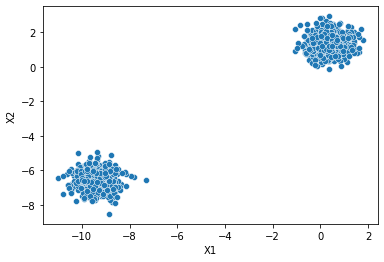

In [94]:
sns.scatterplot(data=two_blobs, x="X1", y="X2")

In [95]:
two_blobs_outliers.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


<AxesSubplot:xlabel='X1', ylabel='X2'>

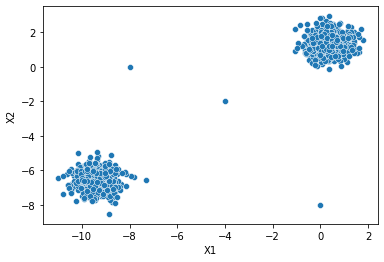

In [96]:
sns.scatterplot(data=two_blobs_outliers, x="X1", y="X2")

In [97]:
def display_categories(model,data):

    labels = model.fit_predict(data)
    sns.scatterplot(data=data, x="X1", y="X2", hue=labels, palette="Set1")

### DBSCAN

In [98]:
from sklearn.cluster import DBSCAN

In [99]:
dbscan = DBSCAN()

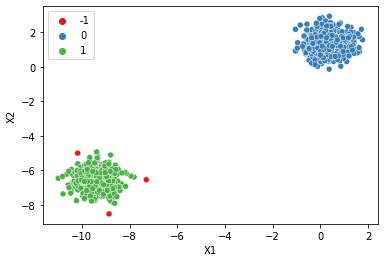

In [100]:
display_categories(dbscan, two_blobs)

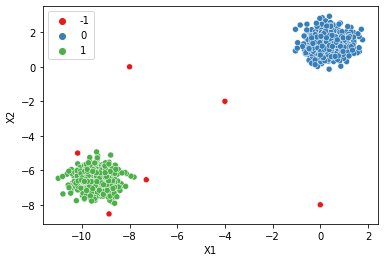

In [101]:
display_categories(dbscan, two_blobs_outliers)

### Epsilon

    eps : float, default=0.5
     |      The maximum distance between two samples for one to be considered
     |      as in the neighborhood of the other. This is not a maximum bound
     |      on the distances of points within a cluster. This is the most
     |      important DBSCAN parameter to choose appropriately for your data set
     |      and distance function.

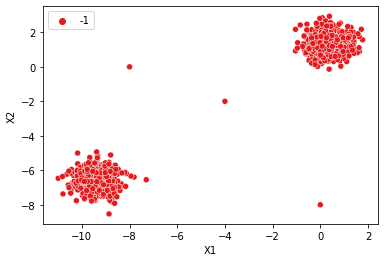

In [102]:
dbscan = DBSCAN(eps=0.001)
display_categories(dbscan, two_blobs_outliers)

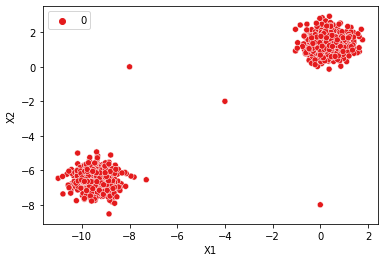

In [103]:
dbscan = DBSCAN(eps=10)
display_categories(dbscan,two_blobs_outliers)

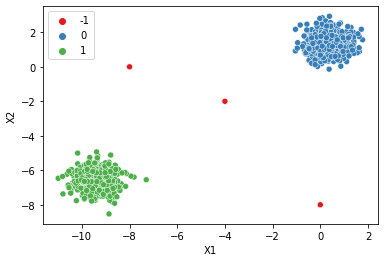

In [104]:
dbscan = DBSCAN(eps=1)
display_categories(dbscan,two_blobs_outliers)

In [105]:
np.sum(dbscan.labels_== -1)

3

In [106]:
100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

0.29910269192422734

In [107]:
outlier_percent = []
number_of_outliers = []

for eps in np.linspace(0.001,10,100):
    
    # Create Model
    dbscan = DBSCAN(eps=eps)
    dbscan.fit(two_blobs_outliers)
    
    # Log Number of Outliers
    number_of_outliers.append(np.sum(dbscan.labels_ == -1))
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)
    

(0.0, 1.0)

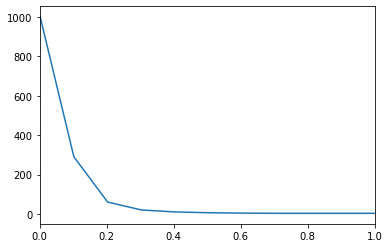

In [108]:
sns.lineplot(x=np.linspace(0.001,10,100), y=number_of_outliers)
plt.xlim(0,1)

(0.0, 1.0)

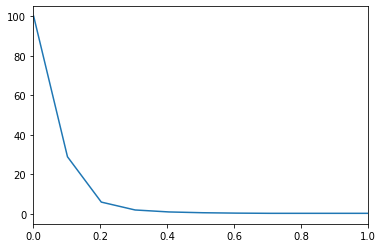

In [109]:
sns.lineplot(x=np.linspace(0.001,10,100), y=outlier_percent)
plt.xlim(0,1)

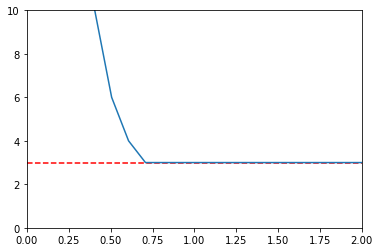

In [110]:
sns.lineplot(x=np.linspace(0.001,10,100), y=number_of_outliers)
plt.xlim(0,1)
plt.ylim(0,10)
plt.xlim(0,2)
plt.hlines(y=3,xmin=0,xmax=2,colors='red',ls='--')

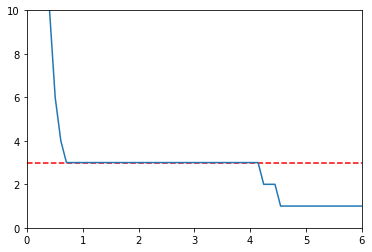

In [111]:
sns.lineplot(x=np.linspace(0.001,10,100),y=number_of_outliers)
plt.ylim(0,10)
plt.xlim(0,6)
plt.hlines(y=3,xmin=0,xmax=10,colors='red',ls='--')

### Minimum Samples

     |  min_samples : int, default=5
     |      The number of samples (or total weight) in a neighborhood for a point
     |      to be considered as a core point. This includes the point itself.
     

How to choose minimum number of points?

https://stats.stackexchange.com/questions/88872/a-routine-to-choose-eps-and-minpts-for-dbscan

In [112]:
outlier_percent = []

for n in np.arange(1,100):
    
    # Create Model
    dbscan = DBSCAN(min_samples=n)
    dbscan.fit(two_blobs_outliers)
    
    # Log percentage of points that are outliers
    perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
    
    outlier_percent.append(perc_outliers)
    

<AxesSubplot:>

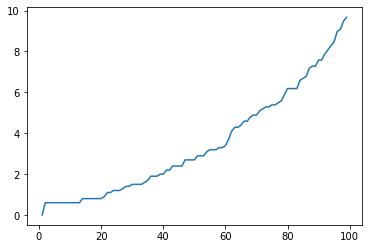

In [113]:
sns.lineplot(x=np.arange(1,100),y=outlier_percent)

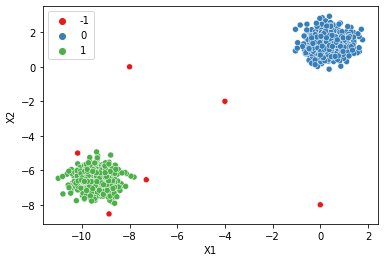

In [114]:
num_dim = two_blobs_outliers.shape[1]

dbscan = DBSCAN(min_samples=2*num_dim)
display_categories(dbscan,two_blobs_outliers)

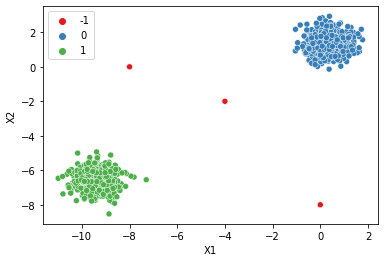

In [115]:
num_dim = two_blobs_outliers.shape[1]

dbscan = DBSCAN(eps=0.75,min_samples=2*num_dim)
display_categories(dbscan,two_blobs_outliers)

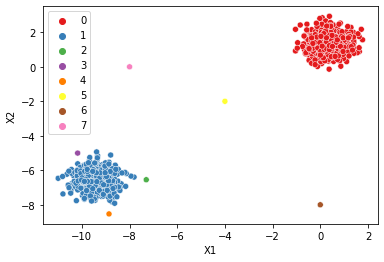

In [116]:
dbscan = DBSCAN(min_samples=1)
display_categories(dbscan,two_blobs_outliers)

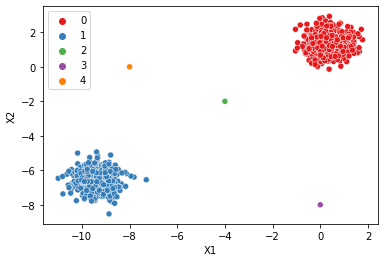

In [117]:
dbscan = DBSCAN(eps=0.75,min_samples=1)
display_categories(dbscan,two_blobs_outliers)